<a href="https://colab.research.google.com/github/ritamsarkar2000/ML/blob/master/Copy_of_project_ardent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas_ta

In [ ]:
#importing the libraries and modules
import pandas as pd
import pandas_ta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
#importing the data
df = pd.read_csv('/content/TSLA.csv')

In [ ]:
#showing the data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2020-12-24,642.98999,666.090027,641.000000,661.770020,661.770020,22865600
249,2020-12-28,674.51001,681.400024,660.799988,663.690002,663.690002,32278600
250,2020-12-29,661.00000,669.900024,655.000000,665.989990,665.989990,22910800
251,2020-12-30,672.00000,696.599976,668.359985,694.780029,694.780029,42846000
252,2020-12-31,699.98999,718.719971,691.119995,705.669983,705.669983,49649900


In [ ]:
#shape of the dataframe
df.shape

(253, 7)

In [ ]:
#getting the columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#brief description of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,289.108428,297.288412,280.697937,289.997067,289.997067,7.530795e+07
std,167.665389,171.702889,163.350196,168.995613,168.995613,4.013706e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.735770e+07
25%,148.367996,154.990005,143.222000,149.792007,149.792007,4.713450e+07
50%,244.296005,245.600006,237.119995,241.731995,241.731995,7.025550e+07
75%,421.390015,430.500000,410.579987,421.200012,421.200012,9.454550e+07
max,699.989990,718.719971,691.119995,705.669983,705.669983,3.046940e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


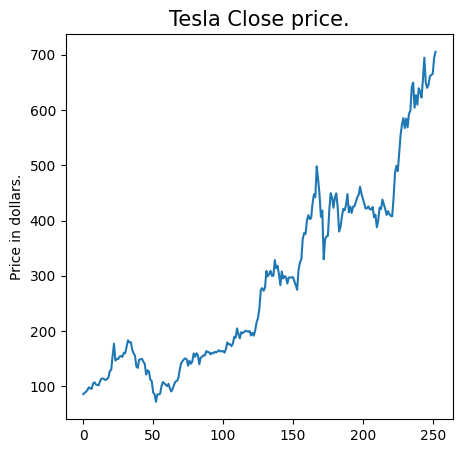

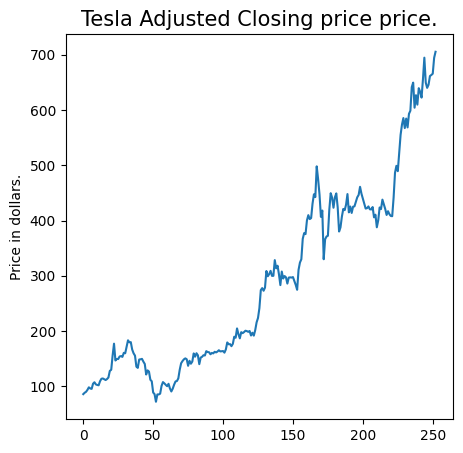

In [ ]:
#exploratory Data analisis
#plotting
plt.figure(figsize=(5,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

plt.figure(figsize=(5,5))
plt.plot(df['Adj Close'])
plt.title('Tesla Adjusted Closing price price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [ ]:
#it seems that the Close column and the adj close column are same , checking whether it is true or not

df[df['Close'] == df['Adj Close']].shape

(253, 7)

In [ ]:
#Both are same so we will drop the Close column as both columns are same
df = df.drop(['Close'], axis=1)
df.head()

,Date,Open,High,Low,Adj Close,Volume
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,47660500
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88892500
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,50665000
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,89410500
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,155721500


In [ ]:
#check if there is any null value
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#preparing the data


#adding Exponential moving average

df.ta.ema(close = 'Adj Close', length = 10, append = True)
df


,Date,Open,High,Low,Adj Close,Volume,EMA_10
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,47660500,NaN
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88892500,NaN
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,50665000,NaN
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,89410500,NaN
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,155721500,NaN
...,...,...,...,...,...,...,...
248,2020-12-24,642.989990,666.090027,641.000000,661.770020,22865600,643.572394
249,2020-12-28,674.510010,681.400024,660.799988,663.690002,32278600,647.230141
250,2020-12-29,661.000000,669.900024,655.000000,665.989990,22910800,650.641022
251,2020-12-30,672.000000,696.599976,668.359985,694.780029,42846000,658.666296


In [ ]:
#dropping 1st 10 columns
df = df.iloc[10:]
print(df.head())

          Date        Open        High         Low   Adj Close     Volume  \
10  2020-01-16   98.750000  102.891998   98.433998  102.697998  108683500   
11  2020-01-17  101.522003  103.134003  100.632004  102.099998   68145500   
12  2020-01-21  106.050003  109.716003  105.681999  109.440002   89017500   
13  2020-01-22  114.377998  118.900002  111.820000  113.912003  156845000   
14  2020-01-23  112.849998  116.400002  111.120003  114.440002   98255000   

        EMA_10  
10   97.656035  
11   98.464028  
12  100.459660  
13  102.905540  
14  105.002715  


<ipython-input-16-cbb10affcc80>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)


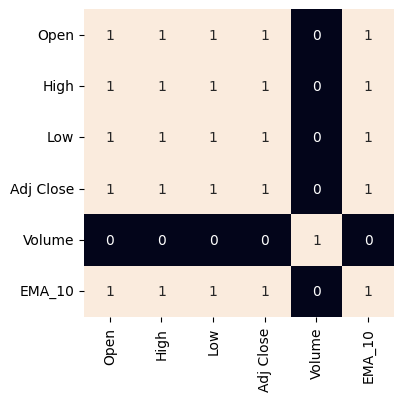

In [ ]:
#Heatmap
plt.figure(figsize=(4, 4))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [ ]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace = True)
df = df.drop(['Date', 'Open', 'High', 'Low', 'Volume'], axis=1)

df.head()

,Adj Close,EMA_10
Date,,
2020-01-16,102.697998,97.656035
2020-01-17,102.099998,98.464028
2020-01-21,109.440002,100.459660
2020-01-22,113.912003,102.905540
2020-01-23,114.440002,105.002715


In [ ]:
#dropping the 1st 10 rows

df=df.iloc[10:]
df.head(20)

,Adj Close,EMA_10
Date,,
2020-01-31,130.113998,116.279015
2020-02-03,156.000000,123.501012
2020-02-04,177.412003,133.303011
2020-02-05,146.940002,135.782464
2020-02-06,149.792007,138.329653
2020-02-07,149.613998,140.381352
2020-02-10,154.255997,142.904015
2020-02-11,154.876007,145.080741
2020-02-12,153.457993,146.603878


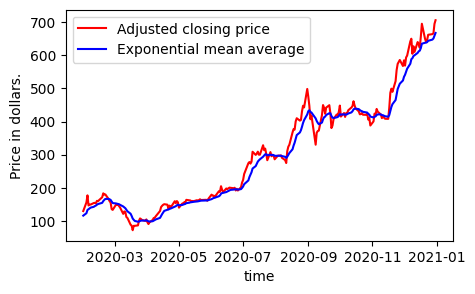

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(df['Adj Close'], 'r', label = 'Adjusted closing price')
plt.plot(df['EMA_10'], 'b', label = 'Exponential mean average')
plt.ylabel('Price in dollars.')
plt.xlabel("time")
plt.legend(loc=0)
plt.show()

In [ ]:
#preparing the Data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_10']], test_size=0.2)

In [ ]:
print(x_train.head())
print("\n\n", y_train.head())

             Adj Close
Date                  
2020-10-05  425.679993
2020-02-21  180.199997
2020-11-25  574.000000
2020-08-25  404.667999
2020-02-28  133.598007


                 EMA_10
Date                  
2020-10-05  421.881022
2020-02-21  166.687010
2020-11-25  498.225223
2020-08-25  373.946214
2020-02-28  154.084182


In [ ]:
print(x_test.head())
print("\n\n", y_test.head())

             Adj Close
Date                  
2020-05-01  140.264008
2020-06-19  200.179993
2020-08-14  330.141998
2020-10-30  388.040009
2020-12-02  568.820007


                 EMA_10
Date                  
2020-05-01  147.509426
2020-06-19  193.928231
2020-08-14  305.067743
2020-10-30  415.029992
2020-12-02  541.094399


In [ ]:
from sklearn.linear_model import LinearRegression

# Create linear Regression Model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Use model to make predictions
y_pred = model.predict(x_test)

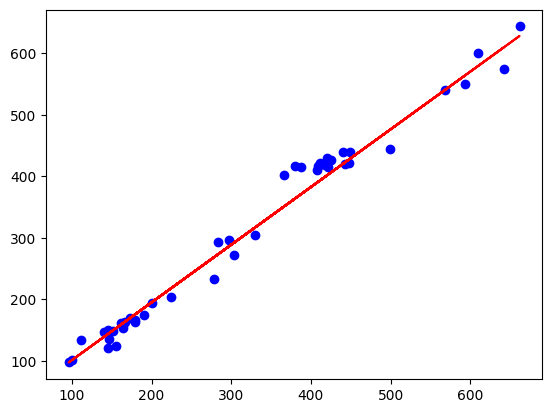

In [ ]:
plt.scatter(x_test, y_test, color='b', label = "Actual target value")
plt.plot(x_test, y_pred , color='r', label = "predicted value")
plt.show()


In [ ]:
#Comparing prediction vs target (EMA)
import numpy as np
Y = y_test[['EMA_10']]
ypred = y_pred.ravel()
Y['Predicted_price'] = ypred.tolist()
Y.rename(columns={"EMA_10":'Target_price'}, inplace=True)
Y.head(5)

,Target_price,Predicted_price
Date,,
2020-05-01,147.509426,139.043331
2020-06-19,193.928231,195.240347
2020-08-14,305.067743,317.135646
2020-10-30,415.029992,371.439944
2020-12-02,541.094399,540.998977


In [ ]:
#evaluation


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Printout relevant metrics
print("c intercept", model.intercept_)
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error", mean_squared_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

c intercept [7.48547157]
Model Coefficients: [[0.93793027]]
Mean Absolute Error: 15.910915852543125
Mean Squared Error 429.39149865881205
Coefficient of Determination: 0.9820387753690646
